<a href="https://colab.research.google.com/github/seohyun126/LG-Aimers-6th/blob/main/Aimers_%EC%A0%84%EC%B2%98%EB%A6%AC_2%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0 데이터 확인**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train=pd.read_csv('/content/drive/MyDrive/Aimers_data/train.csv').drop(columns=['ID'])
test=pd.read_csv("/content/drive/MyDrive/Aimers_data/test.csv").drop(columns=['ID'])
submission=pd.read_csv("/content/drive/MyDrive/Aimers_data/sample_submission.csv")

In [ ]:
train2=pd.read_csv('/content/drive/MyDrive/Aimers_data/train.csv').drop(columns=['ID'])

In [ ]:
train.shape

(256351, 68)

### **보정된 나이**

In [ ]:
age_table=pd.concat([train[train['난자 출처']=='본인 제공'].groupby('시술 당시 나이')['임신 성공 여부'].mean(),
            train[train['난자 출처']=='알 수 없음'].groupby('시술 당시 나이')['임신 성공 여부'].mean(),
          ],axis=1)
age_table.columns=['본인 제공','출처 알 수 없음']
train_age4=train[train['난자 출처']=='기증 제공']
age_table2=train_age4.pivot_table(values='임신 성공 여부', index='시술 당시 나이',columns='난자 기증자 나이',aggfunc='mean')
age_result=pd.concat([age_table,age_table2],axis=1)
age_result

,본인 제공,출처 알 수 없음,만20세 이하,만21-25세,만26-30세,만31-35세,알 수 없음
시술 당시 나이,,,,,,,
만18-34세,0.325815,0.194592,0.285714,0.317460,0.344639,0.297089,0.246637
만35-37세,0.280439,0.151034,0.161290,0.350230,0.341651,0.310345,0.288194
만38-39세,0.215694,0.102564,0.187500,0.336449,0.360721,0.328616,0.243697
만40-42세,0.145823,0.069498,0.328358,0.339216,0.353516,0.322751,0.227011
만43-44세,0.064107,0.019093,0.304348,0.362283,0.370198,0.328723,0.236967
만45-50세,0.028216,0.003817,0.244444,0.300741,0.327869,0.268325,0.264925
알 수 없음,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train['보정된 나이']=50.0 # 시술 당시 나이가 알 수 없음 일 경우
train.loc[train['시술 당시 나이']=='만18-34세','보정된 나이']=30.0
train.loc[train['시술 당시 나이']=='만35-37세','보정된 나이']=36.0
train.loc[train['시술 당시 나이']=='만38-39세','보정된 나이']=38.5
train.loc[train['시술 당시 나이']=='만40-42세','보정된 나이']=41.0
train.loc[train['시술 당시 나이']=='만43-44세','보정된 나이']=43.5
train.loc[train['시술 당시 나이']=='만45-50세','보정된 나이']=47.5

In [ ]:
test['보정된 나이']=50.0 # 시술 당시 나이가 알 수 없음 일 경우
test.loc[test['시술 당시 나이']=='만18-34세','보정된 나이']=30.0
test.loc[test['시술 당시 나이']=='만35-37세','보정된 나이']=36.0
test.loc[test['시술 당시 나이']=='만38-39세','보정된 나이']=38.5
test.loc[test['시술 당시 나이']=='만40-42세','보정된 나이']=41.0
test.loc[test['시술 당시 나이']=='만43-44세','보정된 나이']=43.5
test.loc[test['시술 당시 나이']=='만45-50세','보정된 나이']=47.5

In [ ]:
train['보정된 나이']=train['보정된 나이'].astype(float)
test['보정된 나이']=test['보정된 나이'].astype(float)

In [ ]:
train.loc[train['난자 출처']=='알 수 없음','난자 출처']='출처 모름'
test.loc[test['난자 출처']=='알 수 없음','난자 출처']='출처 모름'

In [ ]:
train['난자 출처'].value_counts()

,count
난자 출처,
본인 제공,234291
기증 제공,15769
출처 모름,6291


In [ ]:
train['난자 기증자 나이'].value_counts()

,count
난자 기증자 나이,
알 수 없음,242381
만31-35세,6366
만26-30세,4976
만21-25세,2334
만20세 이하,294


In [ ]:
train.shape

(256351, 69)

In [ ]:
# 본인 제공의 시술 당시 나이별 임신 성공 여부 평균 계산
mean_success_bonin = train[train['난자 출처'] == '본인 제공'].groupby('보정된 나이')['임신 성공 여부'].mean()

# 난자 기증자 나이별 임신 성공 여부 평균 계산
mean_success_donor = pd.concat([train[train['난자 출처'] == '기증 제공'].groupby(['보정된 나이', '난자 기증자 나이'])['임신 성공 여부'].mean().unstack(),
                               train[train['난자 출처'] == '출처 모름'].groupby('보정된 나이')['임신 성공 여부'].mean()],axis=1)
mean_success_donor.columns=['만20세 이하', '만21-25세', '만26-30세', '만31-35세', '기증나 나이 모름', '출처 모름']

In [ ]:
mean_success_donor

,만20세 이하,만21-25세,만26-30세,만31-35세,기증나 나이 모름,출처 모름
보정된 나이,,,,,,
30.0,0.285714,0.317460,0.344639,0.297089,0.246637,0.194592
36.0,0.161290,0.350230,0.341651,0.310345,0.288194,0.151034
38.5,0.187500,0.336449,0.360721,0.328616,0.243697,0.102564
41.0,0.328358,0.339216,0.353516,0.322751,0.227011,0.069498
43.5,0.304348,0.362283,0.370198,0.328723,0.236967,0.019093
47.5,0.244444,0.300741,0.327869,0.268325,0.264925,0.003817


In [ ]:
mean_success_bonin

,임신 성공 여부
보정된 나이,
30.0,0.325815
36.0,0.280439
38.5,0.215694
41.0,0.145823
43.5,0.064107
47.5,0.028216
50.0,0.000000


In [ ]:
# 난자 출처가 기증 제공일 경우 시술 당시 나이 보정 함수
def adjust_age(row, mean_success_bonin):
    if row['난자 출처'] != '본인 제공':
        # 난자 기증자 나이별 임신 성공 여부 평균값 계산
        donor_avg_success = train[(train['난자 기증자 나이'] == row['난자 기증자 나이']) &
                                      (train['보정된 나이'] == row['보정된 나이'])]['임신 성공 여부'].mean()

        # 본인 제공의 시술 당시 나이로 보정된 시술 당시 나이를 찾음
        closest_age = min(mean_success_bonin.index, key=lambda x: abs(mean_success_bonin[x] - donor_avg_success))

        # 기증 제공에서 보정된 시술 당시 나이를 본인 제공과의 확률 차이를 반영해 계산
        adjustment = donor_avg_success - mean_success_bonin[closest_age]
        return closest_age + adjustment
    else:
        # 본인 제공일 경우 시술 당시 나이는 그대로 유지
        return row['보정된 나이']

In [ ]:
# 보정된 시술 당시 나이 계산
train['보정된 나이'] = train.apply(adjust_age, axis=1, mean_success_bonin=mean_success_bonin)

In [ ]:
import numpy as np
# 'test'에서 경향성이 똑같다는 가정 하에
# 'train'에서 '보정된 나이'와 관련된 컬럼 선택 (난자 출처, 난자 기증자 나이, 시술 당시 나이)
train_for_mapping = train[['난자 출처', '난자 기증자 나이', '보정된 나이', '시술 당시 나이']].drop_duplicates()

# 'test'에서 '보정된 나이' 계산 (train과 동일한 방법으로 매핑)
def map_adjusted_age_to_test(row, train_for_mapping):
    # 'train'에서 '난자 출처', '난자 기증자 나이', '시술 당시 나이'가 일치하는 행을 찾음
    matching_row = train_for_mapping[(train_for_mapping['난자 출처'] == row['난자 출처']) &
                                     (train_for_mapping['난자 기증자 나이'] == row['난자 기증자 나이']) &
                                     (train_for_mapping['시술 당시 나이'] == row['시술 당시 나이'])]

    # 매칭되는 값이 있을 경우, 해당 '보정된 나이' 반환
    if not matching_row.empty:
        return matching_row['보정된 나이'].values[0]
    else:
        return np.nan  # 매칭되는 값이 없으면 NaN 반환

# 'test'에 보정된 나이 적용
test['보정된 나이'] = test.apply(map_adjusted_age_to_test, axis=1, train_for_mapping=train_for_mapping)

(array([107993.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  57819.,      0.,      0.,  39214.,      0.,
             0.,      0.,  38014.,      0.,      0.,      0.,  10005.,
             0.,      0.,      0.,      0.,      0.,   2977.,      0.,
             0.,    329.]),
 array([29.97853324, 30.64591546, 31.31329769, 31.98067991, 32.64806214,
        33.31544437, 33.98282659, 34.65020882, 35.31759104, 35.98497327,
        36.65235549, 37.31973772, 37.98711994, 38.65450217, 39.32188439,
        39.98926662, 40.65664884, 41.32403107, 41.9914133 , 42.65879552,
        43.32617775, 43.99355997, 44.6609422 , 45.32832442, 45.99570665,
        46.66308887, 47.3304711 , 47.99785332, 48.66523555, 49.33261777,
        50.        ]),
 <BarContainer object of 30 artists>)

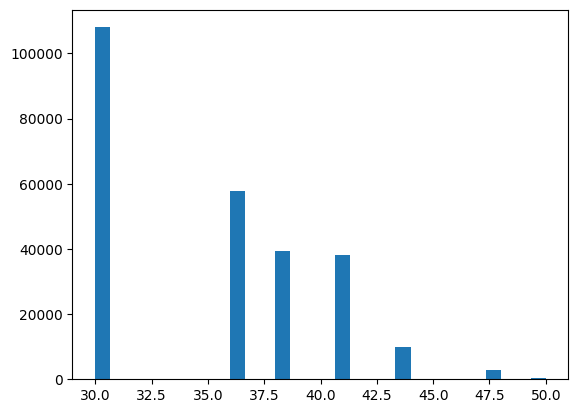

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train['보정된 나이'],bins=30)

(array([38122.,     0.,     0., 20199., 13544., 13580.,  3458.,     0.,
         1048.,   116.]),
 array([29.97853324, 31.98067991, 33.98282659, 35.98497327, 37.98711994,
        39.98926662, 41.9914133 , 43.99355997, 45.99570665, 47.99785332,
        50.        ]),
 <BarContainer object of 10 artists>)

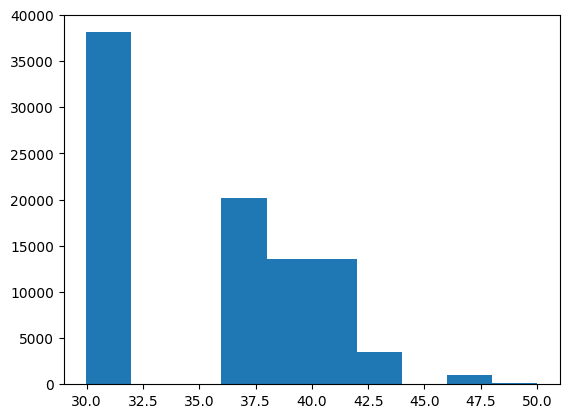

In [ ]:
plt.hist(test['보정된 나이'])

In [ ]:
train[['보정된 나이','임신 성공 여부']].corr()

,보정된 나이,임신 성공 여부
보정된 나이,1.000000,-0.171053
임신 성공 여부,-0.171053,1.000000


### **특정 시술 유형**

In [ ]:
train=train[train['특정 시술 유형']!='GIFT']
train=train[train['특정 시술 유형']!='FER']

In [ ]:
train2=train2[train2['특정 시술 유형']!='GIFT']
train2=train2[train2['특정 시술 유형']!='FER']
train2= train2.dropna(subset=['특정 시술 유형'])

In [ ]:
train2.shape

(256344, 68)

In [ ]:
# '특정 시술 유형' 열에 NaN 값이 있는 행을 삭제
train = train.dropna(subset=['특정 시술 유형'])

In [ ]:
# 특정 시술 유형에서 ICSI: BLASTOCYST와 같은 경우에는 두가지 시술을 모두 다 했다는 의미로
# 주요 단어들로 column을 만들어서 해당 시술을 했으면 1, 아니면 0으로
# 특정 시술 유형에 대해 1 또는 0으로 표시할 칼럼 생성
categories = ['ICSI', 'IVF', 'IUI', 'BLASTOCYST', 'AH', 'Generic DI', 'IVI']
for category in categories:
    train[category] = train['특정 시술 유형'].str.contains(category).astype(int)

In [ ]:
for category in categories:
    test[category] = test['특정 시술 유형'].str.contains(category).astype(int)

In [ ]:
train[train['특정 시술 유형']=='Unknown'][['ICSI', 'IVF', 'IUI', 'BLASTOCYST', 'AH', 'Generic DI', 'IVI']].sum()

,0
ICSI,0
IVF,0
IUI,0
BLASTOCYST,0
AH,0
Generic DI,0
IVI,0


In [ ]:
train[['ICSI', 'IVF', 'IUI', 'BLASTOCYST', 'AH', 'Generic DI', 'IVI']].describe()

,ICSI,IVF,IUI,BLASTOCYST,AH,Generic DI,IVI
count,256344.000000,256344.000000,256344.000000,256344.000000,256344.000000,256344.000000,256344.000000
mean,0.501463,0.373892,0.023796,0.011188,0.004260,0.000277,0.000090
std,0.499999,0.483836,0.152414,0.105181,0.065129,0.016640,0.009472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test[['ICSI', 'IVF', 'IUI', 'BLASTOCYST', 'AH', 'Generic DI', 'IVI']].describe()

,ICSI,IVF,IUI,BLASTOCYST,AH,Generic DI,IVI
count,90067.000000,90067.000000,90067.000000,90067.000000,90067.000000,90067.000000,90067.000000
mean,0.503880,0.374443,0.023471,0.010825,0.004097,0.000289,0.000089
std,0.499988,0.483982,0.151396,0.103480,0.063877,0.016988,0.009424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test[test['특정 시술 유형']=='Unknown'][['ICSI', 'IVF', 'IUI', 'BLASTOCYST', 'AH', 'Generic DI', 'IVI']].sum()

,0
ICSI,0
IVF,0
IUI,0
BLASTOCYST,0
AH,0
Generic DI,0
IVI,0


In [ ]:
train['임신 시도 또는 마지막 임신 경과 연수'].fillna(0,inplace=True)

(array([2.46992e+05, 1.10000e+02, 9.97000e+02, 2.20500e+03, 2.19900e+03,
        1.64800e+03, 9.91000e+02, 5.85000e+02, 3.42000e+02, 2.75000e+02]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

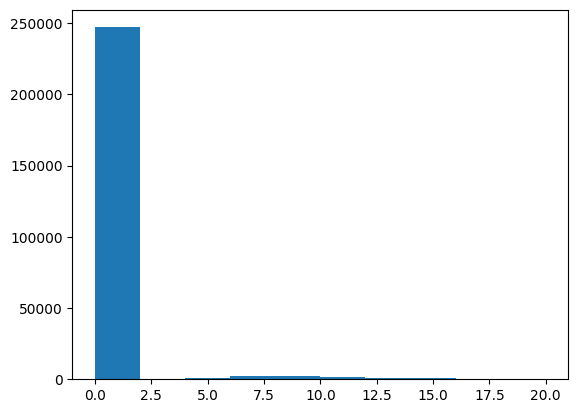

In [ ]:
plt.hist(train['임신 시도 또는 마지막 임신 경과 연수'],bins=10)

너무 NaN이 많음.. drop

In [ ]:
# 시술 유형이 IVF면 1, DI면 0으로
train_IVF=train[train['시술 유형']=='IVF']
train_DI=[train['시술 유형']=='DI']

In [ ]:
test_IVF=test[test['시술 유형']=='IVF']
test_DI=[test['시술 유형']=='DI']

### **너무 NaN이 많은/ 불필요한 컬럼 제외**
**['시술 시기 코드','특정 시술 유형','불임 원인 - 여성 요인','배란 유도 유형','임신 시도 또는 마지막 임신 경과 연수','난자 채취 경과일','난자 해동 경과일']**


In [ ]:
# 너무 NaN이 많은 컬럼 제외
#train.drop(['시술 시기 코드','특정 시술 유형','불임 원인 - 여성 요인','배란 유도 유형','임신 시도 또는 마지막 임신 경과 연수','난자 채취 경과일','난자 해동 경과일'],axis=1,inplace=True)
test.drop(['시술 시기 코드','특정 시술 유형','불임 원인 - 여성 요인','배란 유도 유형','임신 시도 또는 마지막 임신 경과 연수','난자 채취 경과일','난자 해동 경과일'],axis=1,inplace=True)

In [ ]:
train.drop('배아 해동 경과일',axis=1,inplace=True)
test.drop('배아 해동 경과일',axis=1,inplace=True)

In [ ]:
print(train.shape)
print(test.shape)

(256344, 69)
(90067, 68)


In [ ]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 0])

,0
단일 배아 이식 여부,6290
착상 전 유전 검사 사용 여부,253626
착상 전 유전 진단 사용 여부,6290
배아 생성 주요 이유,6290
총 생성 배아 수,6290
미세주입된 난자 수,6290
미세주입에서 생성된 배아 수,6290
이식된 배아 수,6290
미세주입 배아 이식 수,6290
저장된 배아 수,6290


### **PGD/PGS 열 생성**

In [ ]:
test[['착상 전 유전 진단 사용 여부','PGD 시술 여부','착상 전 유전 검사 사용 여부','PGS 시술 여부']]=test[['착상 전 유전 진단 사용 여부','PGD 시술 여부','착상 전 유전 검사 사용 여부','PGS 시술 여부']].fillna(0)

In [ ]:
train[['착상 전 유전 진단 사용 여부','PGD 시술 여부','착상 전 유전 검사 사용 여부','PGS 시술 여부']]=train[['착상 전 유전 진단 사용 여부','PGD 시술 여부','착상 전 유전 검사 사용 여부','PGS 시술 여부']].fillna(0)

In [ ]:
train['PGD']=train['PGD 시술 여부']+train['착상 전 유전 진단 사용 여부']
train['PGS']=train['PGS 시술 여부']+train['착상 전 유전 검사 사용 여부']

In [ ]:
train['PGD'].value_counts()

,count
PGD,
0.0,253148
2.0,2179
1.0,1017


In [ ]:
train['PGS'].value_counts()

,count
PGS,
0.0,253626
2.0,1929
1.0,789


In [ ]:
test['PGD']=test['PGD 시술 여부']+test['착상 전 유전 진단 사용 여부']
test['PGS']=test['PGS 시술 여부']+test['착상 전 유전 검사 사용 여부']

In [ ]:
train.drop(['착상 전 유전 진단 사용 여부','PGD 시술 여부','착상 전 유전 검사 사용 여부','PGS 시술 여부'],axis=1,inplace=True)
test.drop(['착상 전 유전 진단 사용 여부','PGD 시술 여부','착상 전 유전 검사 사용 여부','PGS 시술 여부'],axis=1,inplace=True)

### **배아 생성 주요 이유**
-> 현재 시술용 or not으로

In [ ]:
train['현재 시술용 여부']=0.0
train.loc[train['배아 생성 주요 이유'].isna(),'현재 시술용 여부']=0.5
train.loc[train['배아 생성 주요 이유'].str.contains('현재 시술용',na=False),'현재 시술용 여부']=1

In [ ]:
test['현재 시술용 여부']=0.0
test.loc[test['배아 생성 주요 이유'].isna(),'현재 시술용 여부']=0.5
test.loc[test['배아 생성 주요 이유'].str.contains('현재 시술용',na=False),'현재 시술용 여부']=1

In [ ]:
train.drop('배아 생성 주요 이유',axis=1,inplace=True)
test.drop('배아 생성 주요 이유',axis=1,inplace=True)

In [ ]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 6290])

,0
난자 혼합 경과일,53733
배아 이식 경과일,43561
배아 해동 경과일,215976


### **시술 횟수**

In [ ]:
# 일단 모두 숫자형으로만 바꾸기
train['총 시술 횟수']=train['총 시술 횟수'].str.extract(r'(\d+)').astype(int)
test['총 시술 횟수']=test['총 시술 횟수'].str.extract(r'(\d+)').astype(int)
train['IVF 시술 횟수']=train['IVF 시술 횟수'].str.extract(r'(\d+)').astype(int)
test['IVF 시술 횟수']=test['IVF 시술 횟수'].str.extract(r'(\d+)').astype(int)
train['DI 시술 횟수']=train['DI 시술 횟수'].str.extract(r'(\d+)').astype(int)
test['DI 시술 횟수']=test['DI 시술 횟수'].str.extract(r'(\d+)').astype(int)

In [ ]:
train['클리닉 내 총 시술 횟수']=train['클리닉 내 총 시술 횟수'].str.extract(r'(\d+)').astype(int)
test['클리닉 내 총 시술 횟수']=test['클리닉 내 총 시술 횟수'].str.extract(r'(\d+)').astype(int)

In [ ]:
train[['총 시술 횟수','클리닉 내 총 시술 횟수','IVF 시술 횟수','DI 시술 횟수']].corr()

,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수
총 시술 횟수,1.000000,0.798783,0.916167,0.373273
클리닉 내 총 시술 횟수,0.798783,1.000000,0.706474,0.355614
IVF 시술 횟수,0.916167,0.706474,1.000000,-0.007012
DI 시술 횟수,0.373273,0.355614,-0.007012,1.000000


시술 유형이 IVF 일 경우, IVF 시술 횟수와 총 시술 횟수에 높은 연관성, 그리고 시술 유형이 DI일 경우, DI 시술 횟수와 총 시술 횟수에 높은 연관성을 가짐


총 시술 횟수, 클리닉 내 총 시술 횟수를 제거해야 함

In [ ]:
train['기타 시술 횟수']=train['IVF 시술 횟수']+train['DI 시술 횟수']-train['총 시술 횟수']
test['기타 시술 횟수']=test['IVF 시술 횟수']+test['DI 시술 횟수']-test['총 시술 횟수']

In [ ]:
train.drop(['클리닉 내 총 시술 횟수','총 시술 횟수'],axis=1,inplace=True)
test.drop(['클리닉 내 총 시술 횟수','총 시술 횟수'],axis=1,inplace=True)

### **출산 횟수**

In [ ]:
train['IVF 출산 횟수']=train['IVF 출산 횟수'].str.extract(r'(\d+)').astype(int)
test['IVF 출산 횟수']=test['IVF 출산 횟수'].str.extract(r'(\d+)').astype(int)
train['DI 출산 횟수']=train['DI 출산 횟수'].str.extract(r'(\d+)').astype(int)
test['DI 출산 횟수']=test['DI 출산 횟수'].str.extract(r'(\d+)').astype(int)
train['총 출산 횟수']=train['총 출산 횟수'].str.extract(r'(\d+)').astype(int)
test['총 출산 횟수']=test['총 출산 횟수'].str.extract(r'(\d+)').astype(int)

In [ ]:
train[['총 출산 횟수','IVF 출산 횟수','DI 출산 횟수']].corr()

,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수
총 출산 횟수,1.000000,0.960738,0.251058
IVF 출산 횟수,0.960738,1.000000,-0.027371
DI 출산 횟수,0.251058,-0.027371,1.000000


In [ ]:
(train['총 출산 횟수']-train['IVF 출산 횟수']-train['DI 출산 횟수']).value_counts()

,count
0,256344


총 출산 횟수는 IVF 출산 횟수 + DI 출산 횟수임

In [ ]:
train.drop('총 출산 횟수',axis=1,inplace=True)
test.drop('총 출산 횟수',axis=1,inplace=True)

### **임신 횟수**

In [ ]:
train['총 임신 횟수']=train['총 임신 횟수'].str.extract(r'(\d+)').astype(int)
test['총 임신 횟수']=test['총 임신 횟수'].str.extract(r'(\d+)').astype(int)
train['IVF 임신 횟수']=train['IVF 임신 횟수'].str.extract(r'(\d+)').astype(int)
test['IVF 임신 횟수']=test['IVF 임신 횟수'].str.extract(r'(\d+)').astype(int)
train['DI 임신 횟수']=train['DI 임신 횟수'].str.extract(r'(\d+)').astype(int)
test['DI 임신 횟수']=test['DI 임신 횟수'].str.extract(r'(\d+)').astype(int)

In [ ]:
train[['총 임신 횟수','IVF 임신 횟수','DI 임신 횟수']].corr()

,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수
총 임신 횟수,1.000000,0.962996,0.239470
IVF 임신 횟수,0.962996,1.000000,-0.031066
DI 임신 횟수,0.239470,-0.031066,1.000000


In [ ]:
(train['총 임신 횟수']-train['IVF 임신 횟수']-train['DI 임신 횟수']).value_counts()

,count
0,256344


In [ ]:
(test['총 임신 횟수']-test['IVF 임신 횟수']-test['DI 임신 횟수']).value_counts()

,count
0,90067


마찬가지로 임신 횟수는 IVF 임신 횟수 + DI 임신 횟수임

In [ ]:
train.drop('총 임신 횟수',axis=1,inplace=True)
test.drop('총 임신 횟수',axis=1,inplace=True)

### **난자 출처 -> 난자 기증 여부**

In [ ]:
train['난자 기증 여부']=0.0
train.loc[train['난자 출처']=='기증 제공','난자 기증 여부']=1.0

In [ ]:
test['난자 기증 여부']=0.0
test.loc[test['난자 출처']=='기증 제공','난자 기증 여부']=1.0

In [ ]:
train.drop(['난자 출처','난자 기증자 나이'],axis=1,inplace=True)
test.drop(['난자 출처','난자 기증자 나이'],axis=1,inplace=True)

In [ ]:
train['시술 당시 나이']=train2['시술 당시 나이']

In [ ]:
train['시술 당시 나이'].value_counts()

,count
시술 당시 나이,
만18-34세,102473
만35-37세,57777
만38-39세,39247
만40-42세,37347
만43-44세,12253
만45-50세,6918
알 수 없음,329


In [ ]:
train['시술 나이']=50.0 # 시술 당시 나이가 알 수 없음 일 경우
train.loc[train['시술 당시 나이']=='만18-34세','시술 나이']=30.0
train.loc[train['시술 당시 나이']=='만35-37세','시술 나이']=36.0
train.loc[train['시술 당시 나이']=='만38-39세','시술 나이']=38.5
train.loc[train['시술 당시 나이']=='만40-42세','시술 나이']=41.0
train.loc[train['시술 당시 나이']=='만43-44세','시술 나이']=43.5
train.loc[train['시술 당시 나이']=='만45-50세','시술 나이']=47.5

In [ ]:
train[['시술 나이','보정된 나이']].corr()

,시술 나이,보정된 나이
시술 나이,1.000000,0.875198
보정된 나이,0.875198,1.000000


In [ ]:
#train.drop(['시술 당시 나이','시술 나이'],axis=1,inplace=True)
test.drop('시술 당시 나이',axis=1,inplace=True)

In [ ]:
train.columns[train.dtypes == 'object']

Index(['시술 유형'], dtype='object')

### **정자 출처 / 정자 기증자 나이**

In [ ]:
train.groupby('정자 출처')['임신 성공 여부'].mean()

,임신 성공 여부
정자 출처,
기증 제공,0.243753
미할당,0.106557
배우자 및 기증 제공,0.000000
배우자 제공,0.260169


In [ ]:
train.groupby(['정자 출처','정자 기증자 나이'])['임신 성공 여부'].mean()

정자 출처        정자 기증자 나이
기증 제공        만20세 이하      0.209040
             만21-25세      0.241318
             만26-30세      0.247292
             만31-35세      0.248038
             만36-40세      0.245008
             만41-45세      0.241506
             알 수 없음       0.252934
미할당          만21-25세      0.117647
             만26-30세      0.444444
             만31-35세      0.000000
             만36-40세      0.166667
             만41-45세      0.200000
             알 수 없음       0.049180
배우자 및 기증 제공  만21-25세      0.000000
             만26-30세      0.000000
             만31-35세      0.000000
             만36-40세      0.000000
             만41-45세      0.000000
배우자 제공       만20세 이하      0.400000
             만21-25세      0.295082
             만26-30세      0.310345
             만31-35세      0.377358
             만36-40세      0.333333
             만41-45세      0.410256
             알 수 없음       0.260072
Name: 임신 성공 여부, dtype: float64

In [ ]:
train=pd.get_dummies(train, columns=['정자 출처', '정자 기증자 나이'])
test=pd.get_dummies(test, columns=['정자 출처', '정자 기증자 나이'])

### **난자 혼합 경과일**

In [ ]:
train['난자 혼합 경과일']=train['난자 혼합 경과일'].fillna(0)
test['난자 혼합 경과일']=test['난자 혼합 경과일'].fillna(0)

In [ ]:
train.groupby('난자 혼합 경과일')['임신 성공 여부'].mean()

,임신 성공 여부
난자 혼합 경과일,
0.0,0.258563
1.0,0.153689
2.0,0.245098
3.0,0.279412
4.0,0.400000
5.0,0.208333
6.0,0.000000
7.0,0.000000


In [ ]:
train.columns[train.dtypes == 'object']

Index(['시술 유형'], dtype='object')

In [ ]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 0])

,0
단일 배아 이식 여부,6290
총 생성 배아 수,6290
미세주입된 난자 수,6290
미세주입에서 생성된 배아 수,6290
이식된 배아 수,6290
미세주입 배아 이식 수,6290
저장된 배아 수,6290
미세주입 후 저장된 배아 수,6290
해동된 배아 수,6290
해동 난자 수,6290


In [ ]:
pd.DataFrame(test.isna().sum()[test.isna().sum() > 0])

,0
단일 배아 이식 여부,2176
총 생성 배아 수,2176
미세주입된 난자 수,2176
미세주입에서 생성된 배아 수,2176
이식된 배아 수,2176
미세주입 배아 이식 수,2176
저장된 배아 수,2176
미세주입 후 저장된 배아 수,2176
해동된 배아 수,2176
해동 난자 수,2176


In [ ]:
# train 데이터에서 'bool' 타입인 컬럼들을 'int' 타입으로 변환하는 코드
train[train.columns[train.dtypes == 'bool']] = train[train.columns[train.dtypes == 'bool']].astype(int)

In [ ]:
test[test.columns[test.dtypes == 'bool']] = test[test.columns[test.dtypes == 'bool']].astype(int)

In [ ]:
train_IVF=train[train['시술 유형']=='IVF']
train_DI=train[train['시술 유형']=='DI']
test_IVF=test[test['시술 유형']=='IVF']
test_DI=test[test['시술 유형']=='DI']

In [ ]:
train_IVF.drop('시술 유형',axis=1,inplace=True)
train_DI.drop('시술 유형',axis=1,inplace=True)
test_IVF.drop('시술 유형',axis=1,inplace=True)
test_DI.drop('시술 유형',axis=1,inplace=True)

<ipython-input-281-8e0f96e00ce9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_IVF.drop('시술 유형',axis=1,inplace=True)
<ipython-input-281-8e0f96e00ce9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_DI.drop('시술 유형',axis=1,inplace=True)
<ipython-input-281-8e0f96e00ce9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_IVF.drop('시술 유형',axis=1,inplace=True)
<ipython-input-281-8e0f96e00ce9>:4: SettingWithCopyWarning: 
A 

In [ ]:
train_IVF.head()

,배란 자극 여부,단일 배아 이식 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,...,정자 출처_미할당,정자 출처_배우자 및 기증 제공,정자 출처_배우자 제공,정자 기증자 나이_만20세 이하,정자 기증자 나이_만21-25세,정자 기증자 나이_만26-30세,정자 기증자 나이_만31-35세,정자 기증자 나이_만36-40세,정자 기증자 나이_만41-45세,정자 기증자 나이_알 수 없음
0,1,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0.0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
train_DI.isna().sum()[train_DI.isna().sum() > 0]

,0
단일 배아 이식 여부,6290
총 생성 배아 수,6290
미세주입된 난자 수,6290
미세주입에서 생성된 배아 수,6290
이식된 배아 수,6290
미세주입 배아 이식 수,6290
저장된 배아 수,6290
미세주입 후 저장된 배아 수,6290
해동된 배아 수,6290
해동 난자 수,6290


In [ ]:
test_DI.isna().sum()[test_DI.isna().sum() > 0]

,0
단일 배아 이식 여부,2176
총 생성 배아 수,2176
미세주입된 난자 수,2176
미세주입에서 생성된 배아 수,2176
이식된 배아 수,2176
미세주입 배아 이식 수,2176
저장된 배아 수,2176
미세주입 후 저장된 배아 수,2176
해동된 배아 수,2176
해동 난자 수,2176


In [ ]:
# train 데이터에서 NaN 값을 포함하는 컬럼 모두 삭제
train_DI.dropna(axis=1, how='all', inplace=True)
test_DI.dropna(axis=1, how='all', inplace=True)

<ipython-input-283-ba0d4e4e28de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_DI.dropna(axis=1, how='all', inplace=True)
<ipython-input-283-ba0d4e4e28de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_DI.dropna(axis=1, how='all', inplace=True)


In [ ]:
train_DI.shape

(6290, 49)

In [ ]:
test_DI.shape

(2176, 48)

In [ ]:
train_IVF.isna().sum()[train_IVF.isna().sum() > 0]

,0
배아 이식 경과일,37271


In [ ]:
test_IVF.isna().sum()[test_IVF.isna().sum() > 0]

,0
배아 이식 경과일,13070


In [ ]:
train['보정된 나이'].value_counts()

,count
보정된 나이,
30.000000,97531
36.000000,54458
38.500000,36575
41.000000,33040
43.500000,9375
47.500000,2977
29.996931,2517
35.996701,1738
35.987886,1487


In [ ]:
train_IVF.to_csv('/content/drive/MyDrive/Aimers_data/train_IVF.csv',index=False)
train_DI.to_csv('/content/drive/MyDrive/Aimers_data/train_DI.csv',index=False)
test_IVF.to_csv('/content/drive/MyDrive/Aimers_data/test_IVF.csv',index=False)
test_DI.to_csv('/content/drive/MyDrive/Aimers_data/test_DI.csv',index=False)